# Trabalho Final

## Informações do Dataset

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde acontecem algumas festas com turmas de alunos de 18 a 28 anos (média). O conjunto de dados utilizado para esta atividade possui 7 atributos, sendo uma Meta, com período de um ano.

Dataset: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

1.   Data
2.   Temperatura média (C)
3.   Temperatura mínima (C)
4.   Temperatura máxima (C)
5.   Precipitação (mm)
6.   Final de semana
7.   Consumo de cerveja (litros)



In [13]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Carregando repositório com dataset
!wget https://github.com/Andrewsas/trabalho-fundamentos-cid/blob/master/data/Consumo_cerveja.csv?raw=true

# Renomeando dataset
!mv './Consumo_cerveja.csv?raw=true' 'dataset_consumo_cerveja.csv'

# Criando dataframe
df_consumo_cerveja = pd.read_csv('dataset_consumo_cerveja.csv')

--2021-06-23 20:51:52--  https://github.com/Andrewsas/trabalho-fundamentos-cid/blob/master/data/Consumo_cerveja.csv?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Andrewsas/trabalho-fundamentos-cid/raw/master/data/Consumo_cerveja.csv [following]
--2021-06-23 20:51:52--  https://github.com/Andrewsas/trabalho-fundamentos-cid/raw/master/data/Consumo_cerveja.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Andrewsas/trabalho-fundamentos-cid/master/data/Consumo_cerveja.csv [following]
--2021-06-23 20:51:52--  https://raw.githubusercontent.com/Andrewsas/trabalho-fundamentos-cid/master/data/Consumo_cerveja.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting

# Normalização de Dados

In [5]:
# Dados iniciais
df_consumo_cerveja

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Identificando se existe valores nulos no dataframe
df_consumo_cerveja.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [6]:
# Removendo valores nulos
df_consumo_cerveja.dropna(inplace=True)

#Treat numeric values from dataframe
def str_to_num(df_aux, index):
  for i in index:
    col_name = df_aux.columns[i]
    df_aux[col_name] = df_aux[col_name].str.replace('.', '')
    df_aux[col_name] = df_aux[col_name].str.replace(',', '.')
    df_aux[col_name] = pd.to_numeric(df_aux[col_name])
  return df_aux

#transform field types
df_consumo_cerveja = str_to_num(df_consumo_cerveja, [1, 2, 3, 4])

#rename column
df_consumo_cerveja = df_consumo_cerveja.rename(columns={"Consumo de cerveja (litros)": "Consumo de cerveja (Kl)"})

# Apresentando dataframe normalizado
df_consumo_cerveja = df_consumo_cerveja.round(2)
df_consumo_cerveja

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (Kl)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.46
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.97
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.81
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.80
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.90
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.31
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.10
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.31
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.47


Convertendo Valores para Numéricos

In [7]:
columns_aux = ["Temperatura Media (C)", "Temperatura Minima (C)", "Temperatura Maxima (C)", "Precipitacao (mm)", "Final de Semana"]
df_consumo_cerveja[columns_aux] = \
    df_consumo_cerveja[columns_aux].apply(pd.to_numeric)

In [8]:
# Informações do dataframe
df_consumo_cerveja.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     365 non-null    object 
 1   Temperatura Media (C)    365 non-null    float64
 2   Temperatura Minima (C)   365 non-null    float64
 3   Temperatura Maxima (C)   365 non-null    float64
 4   Precipitacao (mm)        365 non-null    float64
 5   Final de Semana          365 non-null    float64
 6   Consumo de cerveja (Kl)  365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 22.8+ KB


In [9]:
df_consumo_cerveja.describe().round(2)

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (Kl)
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25.40
std,3.18,2.83,4.32,12.42,0.45,4.40
min,12.90,10.60,14.50,0.00,0.00,14.34
25%,19.02,15.30,23.80,0.00,0.00,22.01
50%,21.38,17.90,26.90,0.00,0.00,24.87
75%,23.28,19.60,29.40,3.20,1.00,28.63
max,28.86,24.50,36.50,94.80,1.00,37.94


# Análise exploratória

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


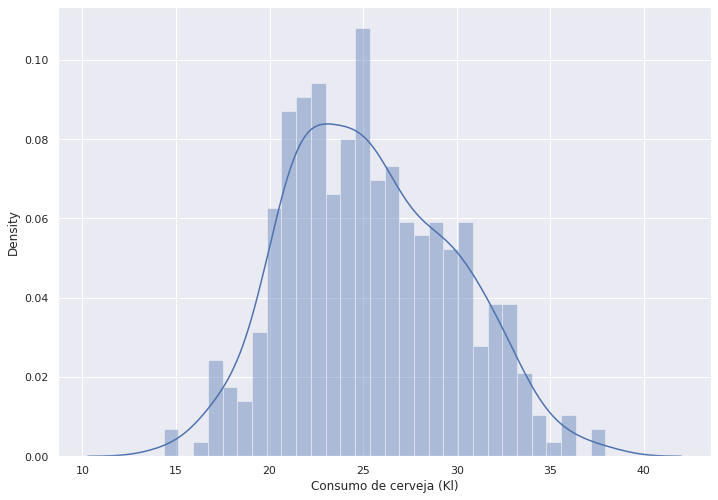

In [16]:
# Analisar distribuição e identificar outliers
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_consumo_cerveja['Consumo de cerveja (Kl)'], bins=30)
plt.show()

                         Temperatura Media (C)  ...  Consumo de cerveja (Kl)
Temperatura Media (C)                     1.00  ...                     0.57
Temperatura Minima (C)                    0.86  ...                     0.39
Temperatura Maxima (C)                    0.92  ...                     0.64
Precipitacao (mm)                         0.02  ...                    -0.19
Final de Semana                          -0.05  ...                     0.51
Consumo de cerveja (Kl)                   0.57  ...                     1.00

[6 rows x 6 columns]


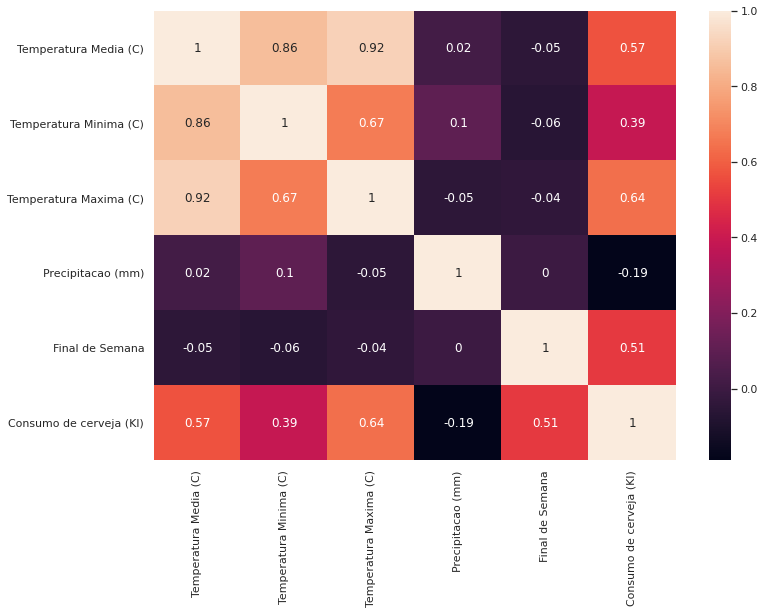

In [17]:
#Correlação de variáveis
correlation_matrix = df_consumo_cerveja.corr().round(2)
print(correlation_matrix)
sns.heatmap(data=correlation_matrix, annot=True)

# Dataset para teste do modelo

Dataset obtido do site https://pt.climate-data.org/

## Carregamento do dataset

In [15]:
# Carregando repositório com dataset
!wget https://github.com/Andrewsas/trabalho-fundamentos-cid/blob/master/data/dados%20climaticos.xlsx?raw=true

# Renomeando dataset
!mv './dados climaticos.xlsx?raw=true' 'dataset_dados_climaticos.xlsx'

--2021-06-23 21:11:23--  https://github.com/Andrewsas/trabalho-fundamentos-cid/blob/master/data/dados%20climaticos.xlsx?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Andrewsas/trabalho-fundamentos-cid/raw/master/data/dados%20climaticos.xlsx [following]
--2021-06-23 21:11:23--  https://github.com/Andrewsas/trabalho-fundamentos-cid/raw/master/data/dados%20climaticos.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Andrewsas/trabalho-fundamentos-cid/master/data/dados%20climaticos.xlsx [following]
--2021-06-23 21:11:23--  https://raw.githubusercontent.com/Andrewsas/trabalho-fundamentos-cid/master/data/dados%20climaticos.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110

In [22]:
# Criando dataframe
df_dados_climaticos = pd.read_excel('dataset_dados_climaticos.xlsx')

df_dados_climaticos

,Data,Temperatura Media ( C ),Temperatura Maxima ( C ),Temperatura Minima ( C ),Precipitacao (mm),Cidade
0,1. Junho,26,29,24,7.8,Manaus
1,2. Junho,26,29,24,8.6,Manaus
2,3. Junho,26,29,24,7.9,Manaus
3,4. Junho,26,29,24,7.3,Manaus
4,5. Junho,26,29,24,6.9,Manaus
...,...,...,...,...,...,...
805,26. Junho,26,32,21,0.0,Palmas
806,27. Junho,27,32,21,0.0,Palmas
807,28. Junho,27,32,21,0.0,Palmas
808,29. Junho,27,32,21,0.0,Palmas


In [26]:
df_dados_climaticos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Data                      810 non-null    object 
 1   Temperatura Media ( C )   810 non-null    int64  
 2   Temperatura Maxima ( C )  810 non-null    int64  
 3   Temperatura Minima ( C )  810 non-null    int64  
 4   Precipitacao (mm)         810 non-null    float64
 5   Cidade                    810 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 38.1+ KB


## Informação de Final de Semana

In [29]:
# print(df_dados_climaticos['Data'].str.startswith('5', na=False))
df_dados_climaticos['Final de Semana'] = np.where( \
                                                  df_dados_climaticos['Data'].str.startswith('5.', na=False) |
                                                  df_dados_climaticos['Data'].str.startswith('6.', na=False) |
                                                  df_dados_climaticos['Data'].str.startswith('12.', na=False) |
                                                  df_dados_climaticos['Data'].str.startswith('13.', na=False) |
                                                  df_dados_climaticos['Data'].str.startswith('19.', na=False) |
                                                  df_dados_climaticos['Data'].str.startswith('20.', na=False) |
                                                  df_dados_climaticos['Data'].str.startswith('26.', na=False) |
                                                  df_dados_climaticos['Data'].str.startswith('27.', na=False), \
                                                  1, 0)
print(df_dados_climaticos)

          Data  Temperatura Media ( C )  ...  Cidade  Final de Semana
0     1. Junho                       26  ...  Manaus                0
1     2. Junho                       26  ...  Manaus                0
2     3. Junho                       26  ...  Manaus                0
3     4. Junho                       26  ...  Manaus                0
4     5. Junho                       26  ...  Manaus                1
..         ...                      ...  ...     ...              ...
805  26. Junho                       26  ...  Palmas                1
806  27. Junho                       27  ...  Palmas                1
807  28. Junho                       27  ...  Palmas                0
808  29. Junho                       27  ...  Palmas                0
809  30. Junho                       27  ...  Palmas                0

[810 rows x 7 columns]
